<a href="https://colab.research.google.com/github/pabhijeet99/DS_Python_files/blob/main/PCA_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Wpca=pd.read_csv("/content/wine.csv")

In [3]:
Wpca.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
Wpca.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [6]:
Wpca.data=Wpca.iloc[:,1:]
Wpca.data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
WPCA=Wpca.data.values
WPCA

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

Normalizong the numerical data

In [8]:
wine_normal=scale(WPCA)
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [11]:
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(wine_normal)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [12]:
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631])

In [13]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([36.2 , 55.41, 66.53])

Variance plot for PCA components obtained bold text

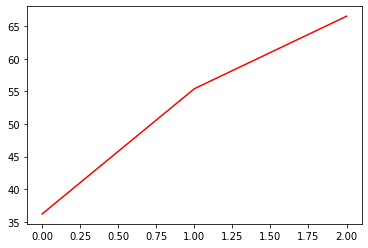

In [14]:
import matplotlib.pyplot as plt
plt.plot(var1,color="red")

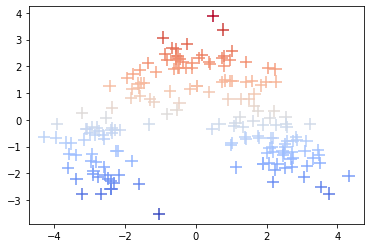

In [15]:
# Plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x, y, marker='+', s=150, linewidths=4, c=y, cmap=plt.cm.coolwarm)

In [16]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return(x)

In [25]:
df_norm = norm_func(pca_values)
df_norm

array([[0.79571551, 0.31636035, 0.44502757],
       [0.68421143, 0.49529033, 0.25765258],
       [0.71515416, 0.35788025, 0.56068773],
       [0.84005536, 0.18414993, 0.44397497],
       [0.56331498, 0.37412528, 0.66580576],
       [0.76887918, 0.24799101, 0.39833717],
       [0.70834173, 0.34340973, 0.36332375],
       [0.66910356, 0.2996944 , 0.47644818],
       [0.71456346, 0.36926748, 0.28338035],
       [0.73900886, 0.3822209 , 0.36260348],
       [0.81212824, 0.33057213, 0.41914796],
       [0.63842177, 0.40009122, 0.34179568],
       [0.67454394, 0.39367368, 0.37460304],
       [0.80995514, 0.34786272, 0.3404465 ],
       [0.89601639, 0.25065207, 0.33444109],
       [0.6938508 , 0.29429801, 0.48366041],
       [0.6804342 , 0.22735709, 0.54547303],
       [0.65294461, 0.29743813, 0.54176564],
       [0.81839668, 0.20811946, 0.4128317 ],
       [0.67162966, 0.35486058, 0.4451275 ],
       [0.77634597, 0.38247673, 0.42497329],
       [0.57113553, 0.43737389, 0.55606991],
       [0.

In [26]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

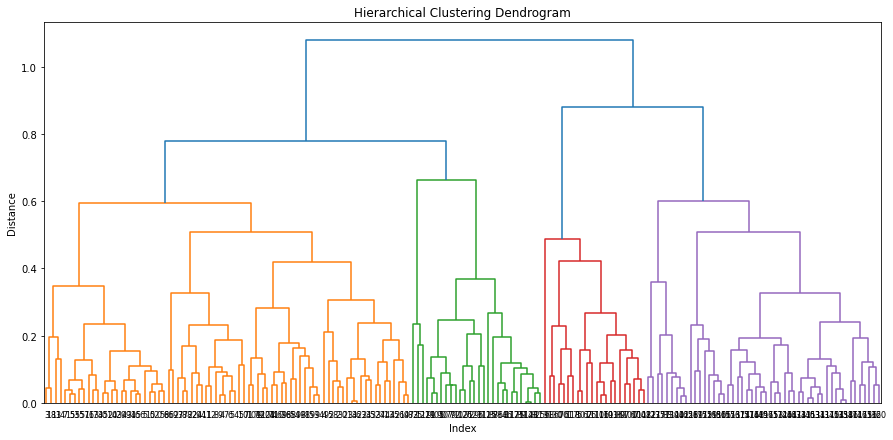

In [27]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch                  # for creating dendrogram 
type(df_norm)

p = np.array(df_norm)                                 # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")

plt.figure(figsize=(15, 7));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,                                  # rotates the x axis labels
    leaf_font_size=8.,                                 # font size for the x axis labels
)
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=7, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0      6
1      0
2      0
3      6
4      0
      ..
173    1
174    1
175    1
176    1
177    1
Length: 178, dtype: int64

In [29]:
Wpca['clust']=cluster_labels                # creating a  new column and assigning it to new column 
Wpca.head
Wpca.iloc[:,1:].groupby(Wpca.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
clust,,,,,,,,,,,,,,
0,13.073654,2.010769,2.345962,17.853846,101.153846,2.680192,2.692885,0.276538,1.965577,4.285385,1.063846,3.103846,856.076923,0.0
1,13.204878,3.363902,2.409024,21.158537,98.829268,1.666341,0.801463,0.435366,1.198049,7.779756,0.660976,1.645610,632.439024,1.0
2,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636,2.0
3,12.153200,2.035600,2.381200,21.808000,90.360000,2.020800,1.888800,0.427600,1.455200,2.769600,1.041200,2.736800,472.800000,3.0
4,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000,4.0
5,12.708889,3.463333,2.635556,24.444444,96.888889,1.858889,1.040000,0.560000,1.155556,4.647778,0.848889,2.180000,557.888889,5.0
6,13.985769,1.926154,2.481538,16.588462,111.923077,3.076923,3.245385,0.292692,2.025385,6.364615,1.076538,3.147308,1226.038462,6.0


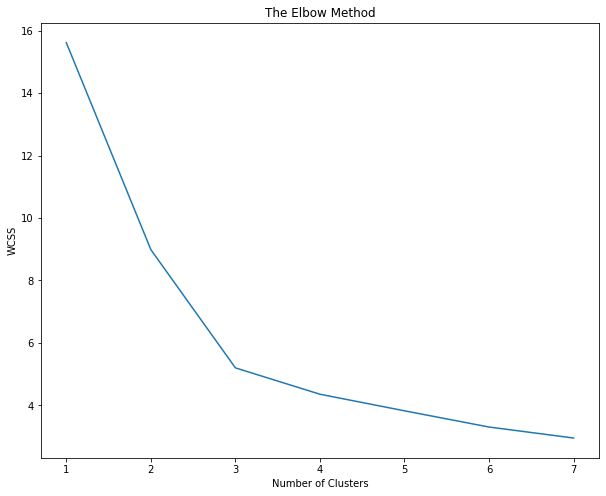

In [30]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 8):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=8, random_state=0)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 8), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [31]:
clf = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=8,  random_state=0)
y_kmeans = clf.fit_predict(df_norm)

In [32]:
y_kmeans

array([3, 0, 3, 3, 5, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 5, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 0, 4, 0,
       0, 2, 2, 0, 2, 4, 4, 5, 0, 2, 2, 2, 0, 4, 2, 0, 4, 1, 4, 2, 4, 4,
       4, 4, 2, 4, 2, 4, 4, 0, 4, 2, 0, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       0, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6,
       1, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 6, 1, 6, 6, 1, 1, 6, 6, 6, 6,
       6, 6], dtype=int32)

In [33]:
clf.cluster_centers_

array([[0.62652764, 0.50315706, 0.42808702],
       [0.17323696, 0.40754329, 0.42090704],
       [0.40853729, 0.66283126, 0.35622656],
       [0.7286097 , 0.32517551, 0.43820512],
       [0.43513823, 0.63057983, 0.57312784],
       [0.61018854, 0.4032098 , 0.82845257],
       [0.2030434 , 0.24071015, 0.47716352]])

In [34]:
md=pd.Series(y_kmeans)        # converting numpy array into pandas series object 
Wpca['clust']=md              # creating a  new column and assigning it to new column 
Wpca

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,6
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,6
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,6
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,6
